In [1]:
print("Hello World")

Hello World


## Numerical Types

##### Integer

In [2]:
type(1)

int

##### Floats

In [3]:
type(1.5)

float

In [4]:
print(3/2)
print(3/2.)

1
1.5


##### Booleans

In [5]:
1 == 1

True

In [6]:
1 > 2

False

In [7]:
type(1>1)

bool

##  Containers

### List

In [8]:
a = [1, 2, 3, 4, 5]
type(a)

list

In [9]:
a[0]

1

In [10]:
a[-1]

5

In [11]:
a[0:3]

[1, 2, 3]

In [12]:
a.append(6)
print(a)

[1, 2, 3, 4, 5, 6]


In [13]:
a[0] = 7
print(a)

[7, 2, 3, 4, 5, 6]


### Tuple

In [14]:
a = (1,2,3)
type(a)

tuple

### Dictionary

In [15]:
element_type = {"D0506": "equad", "D0582": "bpm", "D0543": "cavity"}

In [16]:
element_type['D0506']

'equad'

### String

In [17]:
a = "quad"

In [18]:
a[0]

'q'

In [19]:
a.lower()

'quad'

In [20]:
a.capitalize()

'Quad'

# Control Flow

### if / elif / else

In [21]:
a = 0

if a < 0.:
    print('a is negative')
elif a > 0.:
    print('a is positive')
else:
    print('a equals zero')

a equals zero


In [22]:
a = 5.

if a < 0.:
    print('a is negative')
elif a > 0.:
    print('a is positive')
else:
    print('a equals zero')

a is positive


### for

In [23]:
print(range(4))

[0, 1, 2, 3]


In [24]:
for i in range(5):
    print(i**2)

0
1
4
9
16


### while

In [25]:
n = 5
factorial = 1

while n > 0:
    factorial = factorial*n
    n = n-1
    
print(factorial)

120


### break

In [26]:
for i in range(5):
    if i >= 3:
        break
    print(i)

0
1
2


In [27]:
[i**2 for i in range(4)]

[0, 1, 4, 9]

# Numpy

In [28]:
import numpy as np

In [29]:
a1 = np.array(range(5))
a1

array([0, 1, 2, 3, 4])

In [30]:
a1 = a1**2
a1

array([ 0,  1,  4,  9, 16])

In [31]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [32]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [33]:
a = np.random.rand(5)
a

array([0.1308101 , 0.24860795, 0.96926294, 0.74177074, 0.82663662])

In [34]:
np.sin(a*np.pi)

array([0.39948228, 0.70400767, 0.09641331, 0.72514926, 0.51810776])

# Functions

In [35]:
def factorial(n):
    
    value = 1
    while n > 0:
        value *= n
        n -= 1
    
    return value

a = [factorial(i) for i in range(11)]
print(a)

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]


In [36]:
def binomial_coeff(n=52, k=13):
    num = factorial(n)/(factorial(k)*factorial(n-k))
    return num

In [37]:
p = binomial_coeff()
print("number of distinct 13-card poker hands = {}".format(p))

p = binomial_coeff(k=5)
print("number of distinct 5-card poker hands = {}".format(p))

p = binomial_coeff(k=3, n=5)
print("number of 5-choose-3 combinations = {}".format(p))

print(binomial_coeff(5,3))

number of distinct 13-card poker hands = 635013559600
number of distinct 5-card poker hands = 2598960
number of 5-choose-3 combinations = 10
10


# Class

In [38]:
class Uniform_2D(object):
    
    def __init__(self, xx, xxp, xpxp):
        
        assert xxp**2 < xx*xpxp
        
        self.xx = xx
        self.xxp = xxp
        self.xpxp = xpxp
    
    def generate(self, n):
        
        sigma_matrix = np.array([[self.xx, self.xxp],[self.xxp, self.xpxp]])
        eigenvalues, eigenmatrix = np.linalg.eigh(sigma_matrix)

        r1 = np.sqrt(4*eigenvalues[0])
        r2 = np.sqrt(4*eigenvalues[1])
        
        self.particle_list = np.zeros( (n,2) )

        i = 0    
    
        while i < n:
            x1 = np.random.uniform(-1.0,1.0)
            x2 = np.random.uniform(-1.0,1.0)
            S = (x1**2+x2**2)**0.5
            
            if S <= 1:
                self.particle_list[i,0] = x1*r1
                self.particle_list[i,1] = x2*r2
                
                i += 1
                
        for i in range(n):
            self.particle_list[i] = np.dot(eigenmatrix, self.particle_list[i])                
        
    def calculate_twiss(self):
        self.emittance = np.sqrt(self.xx*self.xpxp)
        self.beta = self.xx/self.emittance
        self.gamma = self.xpxp/self.emittance

In [39]:
beam = Uniform_2D(xx = 10, xxp = 5, xpxp = 20)

In [40]:
beam.xx

10

In [41]:
beam.calculate_twiss()
beam.emittance

14.142135623730951

In [42]:
beam.generate(5000)
beam.particle_list

array([[-4.31264559,  2.02504391],
       [ 1.505809  , -1.68241082],
       [ 2.52160484,  0.46962434],
       ...,
       [-1.89375757,  0.19190276],
       [-4.65184014, -4.24148436],
       [-0.27834127,  2.07110388]])

In [43]:
# Function does not hold anything -
# Objects contains variables (attributes) and one can perform operations on them (methods)

# MatPlotLib

In [44]:
import matplotlib.pyplot as plt

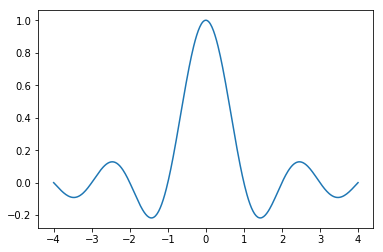

In [45]:
x_array = np.linspace(-4,4,401)
y_array = np.sinc(x_array)

plt.plot(x_array, y_array)
plt.show()

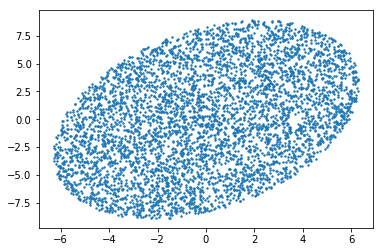

In [46]:
plt.scatter(beam.particle_list[:,0], beam.particle_list[:,1], s=2)
plt.show()

# Importing Modules

In [47]:
import distribution
import matplotlib.pyplot as plt

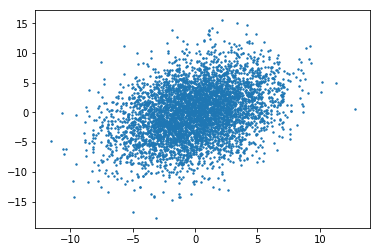

In [48]:
beam = distribution.Gaussian_2D(xx = 10, xxp = 5, xpxp = 20)
beam.generate(5000)
plt.scatter(beam.particle_list[:,0], beam.particle_list[:,1], s=2)
plt.show()

In [49]:
from distribution import Gaussian_2D

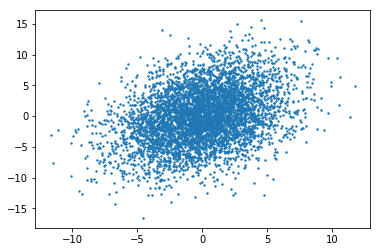

In [50]:
beam = distribution.Gaussian_2D(xx = 10, xxp = 5, xpxp = 20)
beam.generate(5000)
plt.scatter(beam.particle_list[:,0], beam.particle_list[:,1], s=2)
plt.show()